**In this file we take out the attributes that travelers are considering while selecting a hotel**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Libraries for Text data
import spacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
data = pd.read_csv('hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Attributes based on Reviews (**Not Cleaned Data**)

**Not Cleaned Data**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Converet Text into Bi-grams Vectors
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=10000)
X = vectorizer.fit_transform(data.Review)

In [6]:
# Convert X into DataFrame
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
count_vect_df

,00 00,00 30,00 day,00 morning,00 night,00 person,00 pm,10 00,10 10,10 11,...,you the,young children,young kids,young lady,young man,young people,young woman,yr old,zona rosa,zoo station
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Vocabulary with index of Features
vocab = vectorizer.vocabulary_
vocab

{'nice hotel': 5438,
 'hotel expensive': 3869,
 'got good': 3289,
 'good deal': 3161,
 'stay hotel': 8532,
 'arrived late': 393,
 'late evening': 4591,
 'took advice': 9142,
 'previous reviews': 6642,
 'reviews did': 7222,
 'valet parking': 9403,
 'check quick': 1444,
 'quick easy': 6767,
 'little disappointed': 4714,
 'non existent': 5738,
 'view room': 9450,
 'room room': 7539,
 'room clean': 7368,
 'clean nice': 1574,
 'nice size': 5478,
 'size bed': 8077,
 'bed comfortable': 829,
 'pillows not': 6391,
 'room night': 7490,
 'night morning': 5557,
 'hear people': 3569,
 'people talking': 6322,
 'maybe just': 5160,
 'bath products': 621,
 'nice did': 5422,
 'did not': 2110,
 'stay nice': 8550,
 'nice touch': 5491,
 'location great': 4836,
 'great walking': 3459,
 'walking distance': 9575,
 'overall nice': 6170,
 'nice experience': 5425,
 'having pay': 3559,
 'ok nothing': 6085,
 'nothing special': 6032,
 'booked suite': 1087,
 'paid extra': 6200,
 'bedroom bathroom': 865,
 'standard h

In [8]:
# Seeing total counts of "good deal"
count_vect_df['good deal'].sum()

238

In [9]:
# Stored the Keys of the Vocabulary into another variable
word_list = vocab.keys()
len(word_list)

10000

In [10]:
# Open the positive and negative words
with open("positive-words.txt","r") as pos:
    pos_word = pos.read().split("\n")
    
with open("negative-words.txt","r") as pos:
    neg_word = pos.read().split("\n")

In [11]:
# Store positive comment in a list

pos_comment = []
for word in word_list:
    if word.split()[0] in pos_word:
        pos_comment.append(word)
    elif word.split()[-1] in pos_word:
        pos_comment.append(word)
pos_comment

['nice hotel',
 'got good',
 'good deal',
 'quick easy',
 'room clean',
 'clean nice',
 'nice size',
 'bed comfortable',
 'nice did',
 'stay nice',
 'nice touch',
 'location great',
 'great walking',
 'overall nice',
 'nice experience',
 'things like',
 'free breakfast',
 'not helpful',
 'helpful asked',
 'good breakfast',
 'best breakfast',
 'convenient hotel',
 'sure good',
 'good got',
 'got nice',
 'great room',
 'good not',
 'not better',
 'beds comfortable',
 'comfortable not',
 'not good',
 'hotel clean',
 'hotel super',
 'nice rooms',
 'good hotel',
 'comfortable bed',
 'room great',
 'nice shower',
 'nice gesture',
 'facilities great',
 'great stay',
 'stay wonderful',
 'wonderful time',
 'location excellent',
 'friendly room',
 'free wine',
 'thought great',
 'great staff',
 'staff friendly',
 'free wireless',
 'feel like',
 'look like',
 'excellent stay',
 'stay great',
 'staff helpful',
 'helpful booked',
 'great walk',
 'not greatest',
 'great coffee',
 'just good',
 'serv

In [12]:
# Store negative comment in a list

neg_comment = []
for word in word_list:
    if word.split()[0] in neg_word:
        neg_comment.append(word)
    elif word.split()[-1] in neg_word:
        neg_comment.append(word)
neg_comment

['hotel expensive',
 'little disappointed',
 'downside room',
 'did complain',
 'street noise',
 'noise not',
 'not problem',
 'problem hotel',
 'little noisy',
 'worst experience',
 'no problems',
 'ca wrong',
 'rock hard',
 'slight problem',
 'complaints hotel',
 'noise rooms',
 'no complaints',
 'needless say',
 'not disappoint',
 'hotel pricey',
 'bit dark',
 'desk rude',
 'staff unfriendly',
 'bad good',
 'not bad',
 'bad location',
 'no problem',
 'problem noise',
 'ca fault',
 'expensive not',
 'bit hard',
 'bit noise',
 'noise street',
 'bathroom sink',
 'traffic noise',
 'complaint hotel',
 'service horrible',
 'loud music',
 'problem no',
 'noise coming',
 'hard beat',
 'little noise',
 'beds hard',
 'spring break',
 'bit slow',
 'rude not',
 'room broken',
 'parking expensive',
 'little expensive',
 'little pricey',
 'worst hotel',
 'cigarette smoke',
 'not disturb',
 'hear noise',
 'outside noise',
 'quite expensive',
 'bad place',
 'terrible hotel',
 'hotel problem',
 'big

In [13]:
# Load the spacy module
nlp = spacy.load('en_core_web_sm')

In [14]:
# finding the pattern
for text in pos_comment[0:100]:
    doc = nlp(text)
    for token in doc:
        print(token.text, token.pos_, token.dep_)
    print('\n')

nice ADJ amod
hotel NOUN ROOT


got VERB ROOT
good ADJ acomp


good ADJ amod
deal NOUN ROOT


quick PROPN ROOT
easy ADV advmod


room NOUN ROOT
clean ADJ amod


clean VERB ROOT
nice ADJ advmod


nice ADJ amod
size NOUN ROOT


bed NOUN npadvmod
comfortable ADJ ROOT


nice ADJ ROOT
did AUX punct


stay VERB ROOT
nice ADJ acomp


nice ADJ amod
touch NOUN ROOT


location NOUN ROOT
great ADJ amod


great ADJ amod
walking NOUN ROOT


overall ADV advmod
nice ADJ ROOT


nice ADJ amod
experience NOUN ROOT


things NOUN ROOT
like ADP prep


free ADJ amod
breakfast NOUN ROOT


not PART neg
helpful ADJ ROOT


helpful ADJ nsubj
asked VERB ROOT


good ADJ amod
breakfast NOUN ROOT


best ADJ amod
breakfast NOUN ROOT


convenient ADJ amod
hotel NOUN ROOT


sure INTJ ROOT
good ADJ intj


good ADJ nsubj
got VERB ROOT


got VERB ROOT
nice ADJ acomp


great ADJ amod
room NOUN ROOT


good ADJ ROOT
not PART neg


not PART neg
better ADJ ROOT


beds VERB ROOT
comfortable ADJ acomp


comfortable ADJ ROOT
not 

In [15]:
# len(doc)

In [16]:
# doc = nlp('bad good')
# for token in doc:
#     print(token.text, token.pos_, token.dep_)

In [17]:
# doc[0].pos_

In [36]:
# Function for Lemmatization
def lemma(word):
    wordnet=WordNetLemmatizer()
    return wordnet.lemmatize(word)

In [37]:
# store positive attributes and the corresponding noun in List

pos_attributes = []
pos_attributes_noun = []

for text in pos_comment:
    doc = nlp(text)
    if (doc[0].pos_=='ADJ' and doc[1].pos_=='NOUN') or (doc[0].pos_=='NOUN' and doc[1].pos_=='ADJ'):
        pos_attributes.append(doc)
        if doc[1].pos_=='NOUN':
            pos_attributes_noun.append(lemma(str(doc[1])))
        else:
            pos_attributes_noun.append(lemma(str(doc[0])))
        
print(pos_attributes)

[nice hotel, good deal, room clean, nice size, bed comfortable, nice touch, location great, great walking, nice experience, free breakfast, good breakfast, best breakfast, convenient hotel, great room, hotel clean, nice rooms, good hotel, comfortable bed, room great, nice shower, nice gesture, facilities great, great stay, wonderful time, location excellent, friendly room, free wine, great staff, staff friendly, free wireless, excellent stay, staff helpful, great walk, great coffee, best friend, room quiet, food good, good drinks, great job, easy walk, positive experience, excellent staff, exceptional service, happy hour, great location, good food, location fabulous, great food, great experience, nice room, positive things, hotel good, good location, rooms decent, decent size, bathrooms clean, location convenient, nice staff, hotel lovely, lovely staff, helpful desk, good luck, staff great, fantastic stay, great view, excellent choice, good choice, quiet staff, better time, clean room,

In [38]:
pos_attributes_noun

['hotel',
 'deal',
 'room',
 'size',
 'bed',
 'touch',
 'location',
 'walking',
 'experience',
 'breakfast',
 'breakfast',
 'breakfast',
 'hotel',
 'room',
 'hotel',
 'room',
 'hotel',
 'bed',
 'room',
 'shower',
 'gesture',
 'facility',
 'stay',
 'time',
 'location',
 'room',
 'wine',
 'staff',
 'staff',
 'wireless',
 'stay',
 'staff',
 'walk',
 'coffee',
 'friend',
 'room',
 'food',
 'drink',
 'job',
 'walk',
 'experience',
 'staff',
 'service',
 'hour',
 'location',
 'food',
 'location',
 'food',
 'experience',
 'room',
 'thing',
 'hotel',
 'location',
 'room',
 'size',
 'bathroom',
 'location',
 'staff',
 'hotel',
 'staff',
 'desk',
 'luck',
 'staff',
 'stay',
 'view',
 'choice',
 'choice',
 'staff',
 'time',
 'room',
 'room',
 'staff',
 'value',
 'bathroom',
 'service',
 'restaurant',
 'price',
 'floor',
 'room',
 'staff',
 'service',
 'hotel',
 'room',
 'hotel',
 'view',
 'restaurant',
 'time',
 'service',
 'internet',
 'hotel',
 'hotel',
 'good',
 'room',
 'size',
 'size',
 'loc

In [40]:
# store negative attributes and the corresponding noun in List

neg_attributes = []
neg_attributes_noun = []

for text in neg_comment:
    doc = nlp(text)
    if (doc[0].pos_=='ADJ' and doc[1].pos_=='NOUN') or (doc[0].pos_=='NOUN' and doc[1].pos_=='ADJ'):
        neg_attributes.append(doc)
        if doc[1].pos_=='NOUN':
            neg_attributes_noun.append(lemma(str(doc[1])))
        else:
            neg_attributes_noun.append(lemma(str(doc[0])))
            
print(neg_attributes)

[hotel expensive, downside room, little noisy, worst experience, slight problem, bit dark, staff unfriendly, bad good, bad location, service horrible, loud music, little noise, bit slow, worst hotel, outside noise, bad place, terrible hotel, big problem, negative reviews, noisy hotel, slow service, bit pricey, bit annoying, bad hotel, terrible experience, terrible service, horrible experience, poor service, big issue, cheap hotel, expensive room, expensive hotel, hotel bad, service slow, difficult time, bad reviews, hard beds, bad review, noisy room, service poor, poor food, bad experience, dark wood, bad service, big mistake, food bad, smoke free, bit expensive, bit disappointed, scrambled eggs, noisy night, disappointed hotel, wrong room, rooms dirty, bad day, bit tired, bit steep, worst thing, expensive hotels, big disappointment, food cold, cold food, disappointed rooms, hard time, bad thing, bit worn, hot cold, expensive food, bad people, real problem, minor problem, cold meats, d

In [41]:
neg_attributes_noun

['hotel',
 'room',
 'noisy',
 'experience',
 'problem',
 'bit',
 'staff',
 'good',
 'location',
 'service',
 'music',
 'noise',
 'bit',
 'hotel',
 'noise',
 'place',
 'hotel',
 'problem',
 'review',
 'hotel',
 'service',
 'bit',
 'bit',
 'hotel',
 'experience',
 'service',
 'experience',
 'service',
 'issue',
 'hotel',
 'room',
 'hotel',
 'hotel',
 'service',
 'time',
 'review',
 'bed',
 'review',
 'room',
 'service',
 'food',
 'experience',
 'wood',
 'service',
 'mistake',
 'food',
 'smoke',
 'bit',
 'bit',
 'egg',
 'night',
 'hotel',
 'room',
 'room',
 'day',
 'bit',
 'bit',
 'thing',
 'hotel',
 'disappointment',
 'food',
 'food',
 'room',
 'time',
 'thing',
 'bit',
 'cold',
 'food',
 'people',
 'problem',
 'problem',
 'meat',
 'location',
 'problem',
 'room',
 'rock',
 'comment',
 'room',
 'need',
 'hotel',
 'food',
 'thing',
 'disappointment',
 'ice',
 'bit',
 'cow',
 'problem',
 'staff',
 'bit',
 'room',
 'day',
 'problem',
 'stress',
 'food',
 'comment',
 'complaint',
 'hotel',
 

In [42]:
# store positive attributes and the corresponding noun into DataFrame and also add the count of that word

pos_dt = {}
for word in pos_attributes:
    pos_dt[str(word)]=count_vect_df[str(word)].sum()
    
pos_s = pd.Series(pos_dt)

pos_df = pd.DataFrame(pos_s, columns=['counts'])
pos_df['noun'] = pos_attributes_noun

pos_df

,counts,noun
nice hotel,716,hotel
good deal,238,deal
room clean,1033,room
nice size,104,size
bed comfortable,366,bed
...,...,...
excellent base,20,base
helpful recommend,21,recommend
hot buffet,24,buffet
grand oasis,20,oasis


In [43]:
# Sort the dataframe into Descending Order
pos_df = pos_df.sort_values('counts', ascending=False)
pos_df.head(20)

,counts,noun
great location,2203,location
staff friendly,2116,staff
hotel great,1451,hotel
staff helpful,1036,staff
room clean,1033,room
great time,858,time
great place,818,place
location great,801,location
good value,795,value
good location,762,location


In [44]:
# group by based on 'noun' and add counts
pos_attributes_noun = pos_df.groupby('noun').sum().sort_values('counts', ascending=False).drop('hotel')
pos_attributes_noun

,counts
noun,
room,10968
staff,8428
location,7677
food,2971
place,2504
...,...
making,20
attitude,20
bonus,20


In [45]:
# store negative attributes and the corresponding noun into DataFrame and also add the count of that word

neg_dt = {}
for word in neg_attributes:
    neg_dt[str(word)]=count_vect_df[str(word)].sum()
    
neg_s = pd.Series(neg_dt)

neg_df = pd.DataFrame(neg_s, columns=['counts'])
neg_df['noun'] = neg_attributes_noun

neg_df

,counts,noun
hotel expensive,87,hotel
downside room,25,room
little noisy,47,noisy
worst experience,33,experience
slight problem,19,problem
...,...,...
cold beer,19,beer
short break,67,break
loud night,19,night
cold towels,24,towel


In [46]:
# Sort the dataframe into Descending Order
neg_df = neg_df.sort_values('counts', ascending=False)
neg_df

,counts,noun
negative reviews,205,review
bad reviews,176,review
hot cold,122,cold
worst hotel,101,hotel
poor service,95,service
...,...,...
cold beer,19,beer
real complaint,19,complaint
loud night,19,night
slight problem,19,problem


In [47]:
# group by based on 'noun' and add counts
neg_attributes_noun = neg_df.groupby('noun').sum().sort_values('counts', ascending=False).drop(['hotel','bit'])
neg_attributes_noun

,counts
noun,
review,433
service,425
food,415
room,310
problem,222
experience,182
thing,169
cold,122
day,114


## WordCloud

In [48]:
from wordcloud import WordCloud
from PIL import Image

image = np.array(Image.open("download.png"))

wc = WordCloud(width = 3000, height = 2000, background_color='black', random_state=1, max_words=100, mask=image)

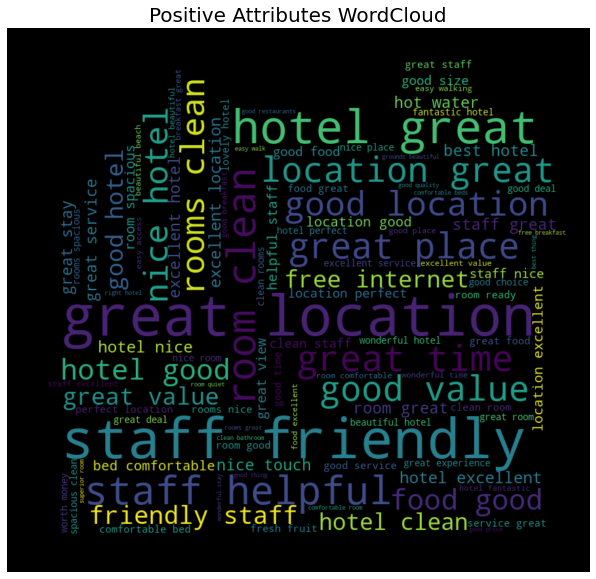

In [49]:
# generate positive attributes word cloud
wc.generate_from_frequencies(pos_dt)

# show
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Positive Attributes WordCloud', fontsize=20)
plt.show()

In [50]:
# converting 'pos_attributes_noun' dataframe into dictionary
pos_attributes_noun = pos_attributes_noun.to_dict()['counts']
pos_attributes_noun

{'room': 10968,
 'staff': 8428,
 'location': 7677,
 'food': 2971,
 'place': 2504,
 'service': 2414,
 'time': 2125,
 'value': 1860,
 'breakfast': 1781,
 'bathroom': 1643,
 'view': 1581,
 'stay': 1485,
 'bed': 1476,
 'pool': 1166,
 'restaurant': 1090,
 'price': 1090,
 'water': 1047,
 'experience': 893,
 'beach': 850,
 'size': 740,
 'area': 740,
 'thing': 695,
 'people': 684,
 'choice': 657,
 'internet': 648,
 'resort': 631,
 'deal': 605,
 'night': 543,
 'touch': 509,
 'vacation': 500,
 'day': 479,
 'ground': 430,
 'review': 409,
 'walking': 394,
 'walk': 369,
 'city': 362,
 'lot': 356,
 'rate': 355,
 'way': 353,
 'access': 352,
 'money': 343,
 'fruit': 343,
 'drink': 343,
 'good': 333,
 'clean': 325,
 'trip': 295,
 'quality': 291,
 'job': 279,
 'shower': 272,
 'weather': 268,
 'towel': 254,
 'coffee': 227,
 'lobby': 226,
 'help': 219,
 'parking': 217,
 'selection': 214,
 'english': 214,
 'desk': 212,
 'tub': 201,
 'air': 196,
 'variety': 195,
 'buffet': 192,
 'family': 179,
 'facility': 

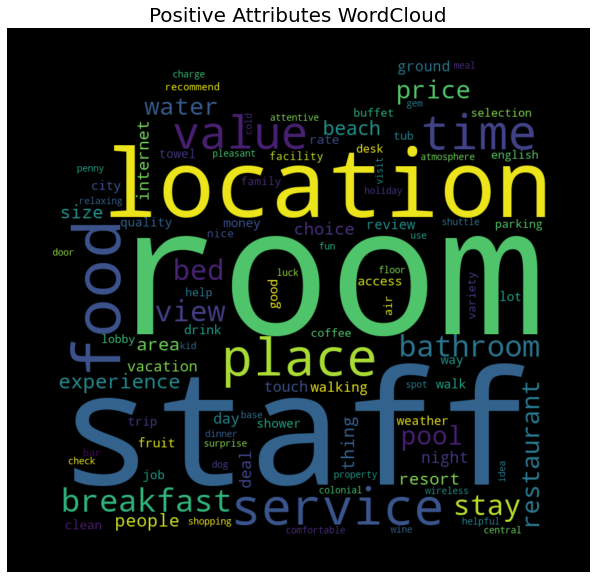

In [51]:
# generate positive-noun attributes word cloud
wc.generate_from_frequencies(pos_attributes_noun)

# show
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Positive Attributes WordCloud', fontsize=20)
plt.show()

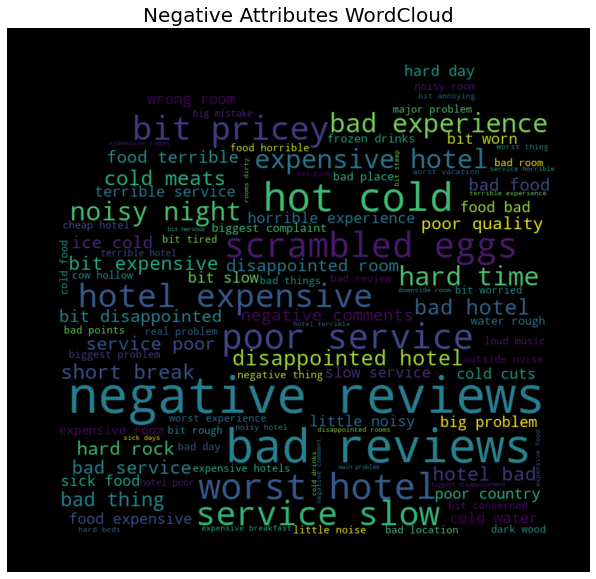

In [52]:
# generate negative attributes word cloud
wc.generate_from_frequencies(neg_dt)

# show
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Negative Attributes WordCloud', fontsize=20)
plt.show()

In [53]:
# converting 'neg_attributes_noun' dataframe into dictionary
neg_attributes_noun = neg_attributes_noun.to_dict()['counts']
neg_attributes_noun

{'review': 433,
 'service': 425,
 'food': 415,
 'room': 310,
 'problem': 222,
 'experience': 182,
 'thing': 169,
 'cold': 122,
 'day': 114,
 'time': 96,
 'egg': 94,
 'night': 92,
 'water': 80,
 'comment': 77,
 'complaint': 74,
 'break': 67,
 'meat': 66,
 'disappointment': 65,
 'drink': 60,
 'place': 56,
 'noise': 56,
 'rock': 55,
 'quality': 53,
 'ice': 49,
 'location': 47,
 'noisy': 47,
 'staff': 45,
 'good': 44,
 'country': 41,
 'cut': 39,
 'music': 32,
 'wood': 31,
 'point': 31,
 'cow': 28,
 'mistake': 27,
 'vacation': 27,
 'breakfast': 27,
 'bed': 26,
 'towel': 24,
 'people': 23,
 'smoke': 23,
 'issue': 23,
 'need': 20,
 'stair': 20,
 'stomach': 20,
 'stress': 20,
 'buffet': 20,
 'beer': 19}

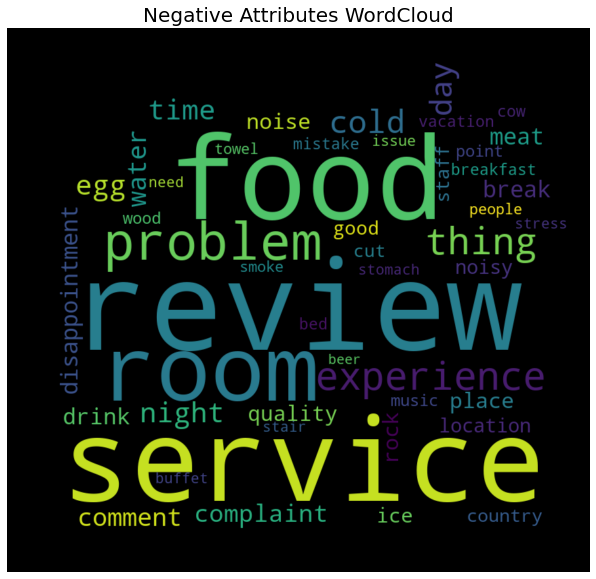

In [54]:
# generate negative-noun attributes word cloud
wc.generate_from_frequencies(neg_attributes_noun)

# show
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Negative Attributes WordCloud', fontsize=20)
plt.show()